# Convenience methods for optimisation

This example demonstrates how to use the convenience methods [fmin](http://pints.readthedocs.io/en/latest/optimisers/running.html#pints.fmin) and [curve_fit](http://pints.readthedocs.io/en/latest/optimisers/running.html#pints.curve_fit) for optimisation.

These methods allow you to perform simple minimisation or curve fitting outside the time-series context typically used in Pints.

### Minimisation with `fmin`

In this part of the example, we define a function `f()` and estimate the arguments that minimise it. For this we use `fmin()`, which has a similar interface to [SciPy's fmin()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html).

In [1]:
import pints

# Define a quadratic function f(x)
def f(x):
    return 1 + (x[0] - 3) ** 2 + (x[1] + 5) ** 2

# Choose a starting point for the search
x0 = [1, 1]

# Find the arguments for which it is minimised
xopt, fopt = pints.fmin(f, x0, method=pints.XNES)
print(xopt)
print(fopt)

[ 3. -5.]
1.0


We can make a contour plot near the true solution to see how we're doing

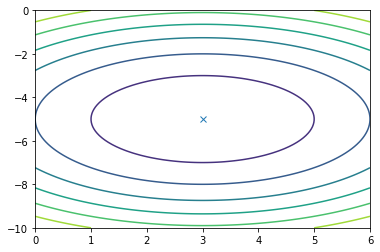

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6, 100)
y = np.linspace(-10, 0, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.stack((X, Y)))

plt.figure()
plt.contour(X, Y, Z)
plt.plot(xopt[0], xopt[1], 'x')
plt.show()

### Curve fitting with `curve_fit`

In this part of the example we fit a curve to some data, using `curve_fit()`, which has a similar interface to [SciPy's curve_fit()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [4]:
# Define a quadratic function `y = f(x|a, b, c)`
def f(x, a, b, c):
    return a + b * x + c * x ** 2

# Generate some test noisy test data
x = np.linspace(-5, 5, 100)
e = np.random.normal(loc=0, scale=2, size=x.shape)
y = f(x, 9, 3, 1) + e

# Find the parameters that give the best fit
x0 = [0, 0, 0]
xopt, fopt = pints.curve_fit(f, x, y, x0, method=pints.XNES)

print(xopt)

[8.28346243 2.91212553 1.05092111]


Again, we can use matplotlib to have a look at the results

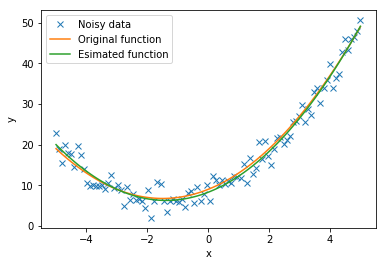

In [6]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'x', label='Noisy data')
plt.plot(x, f(x, 9, 3, 1), label='Original function')
plt.plot(x, f(x, *xopt), label='Esimated function')
plt.legend()
plt.show()